# Linear Regression Model Optimization by Removing Outliers and Variable Transformations

Variable transformation is a way to make the data work better in your model. Data variables can have two types of form: numeric variable and categorical variable, and their transformation should have different approaches.

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

## Recap 

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

from yellowbrick.regressor import PredictionError, ResidualsPlot

In [5]:
data = load_boston()

boston = pd.DataFrame(data.data, columns=data.feature_names)
boston['Price'] = data.target

features = list(data.feature_names)
print('features:\n', features)

boston.head()

features:
 ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
imp_features = ['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

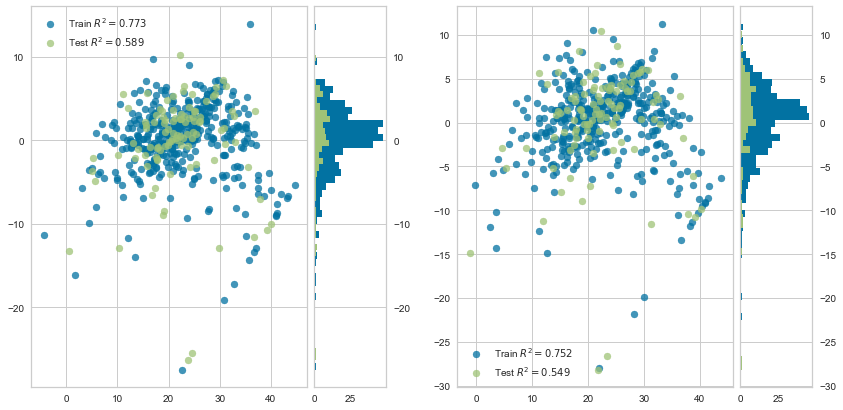

In [8]:
def run_Linear_Regression(df):
    fig,ax = plt.subplots(ncols=2, figsize=(14,7))
    
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(boston[features], boston['Price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[0])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
  

    #Residuals Plot with Selected Features
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(df, boston['Price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()

    
run_Linear_Regression(boston[imp_features])

## Check Linear Model Assumptions on Selected Features

In [9]:
imp_features

['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

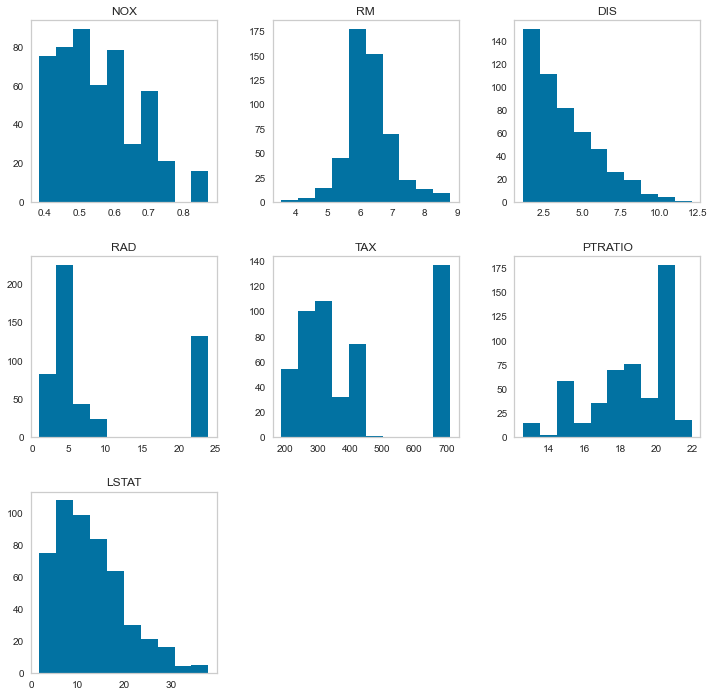

In [13]:
boston[imp_features].hist(figsize=(12,12), grid=False)
plt.show()

Linear Model Assumption
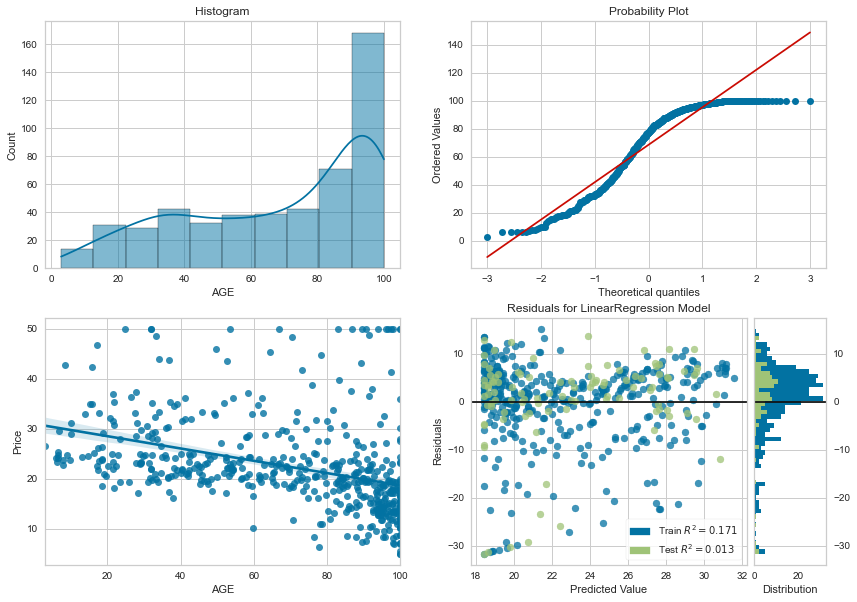

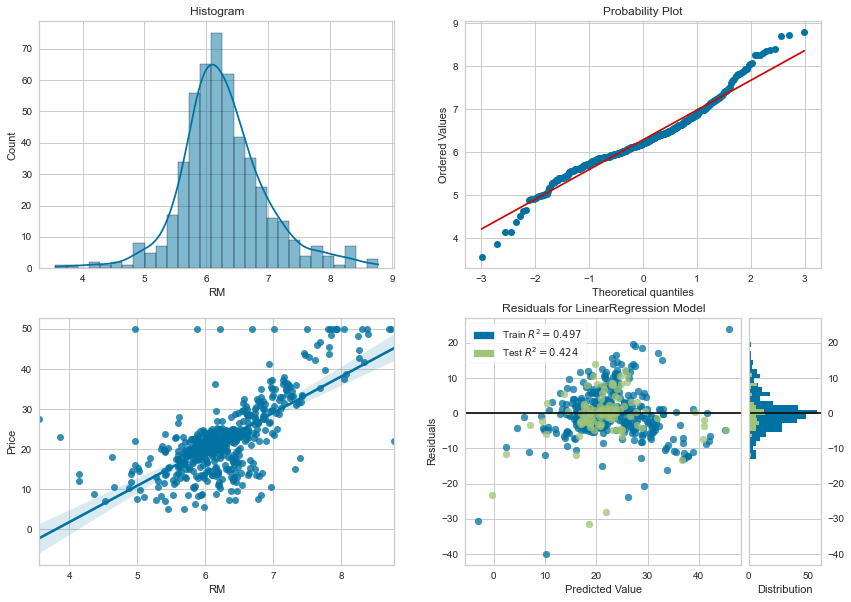

In [20]:
def check_linear_model_assumptions(df, variable):
    plt.figure(figsize=(14,10))
    ax = plt.subplot(2,2,1)
    sns.histplot(df[variable], kde=True, ax=ax)
    plt.title('Histogram')
    
    plt.subplot(2,2,2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    
    ax = plt.subplot(2,2,3)
    sns.regplot(x=variable, y='Price', data=df, order=1, ax=ax)
    
    ax=plt.subplot(2,2,4)
    X_train, X_test, y_train, y_test = train_test_split(df[[variable]], boston['Price'],
                                                       test_size=0.2, random_state=0)
    
    model = LinearRegression()
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    plt.show()
#     plt.legend()
    
check_linear_model_assumptions(boston, 'RM')

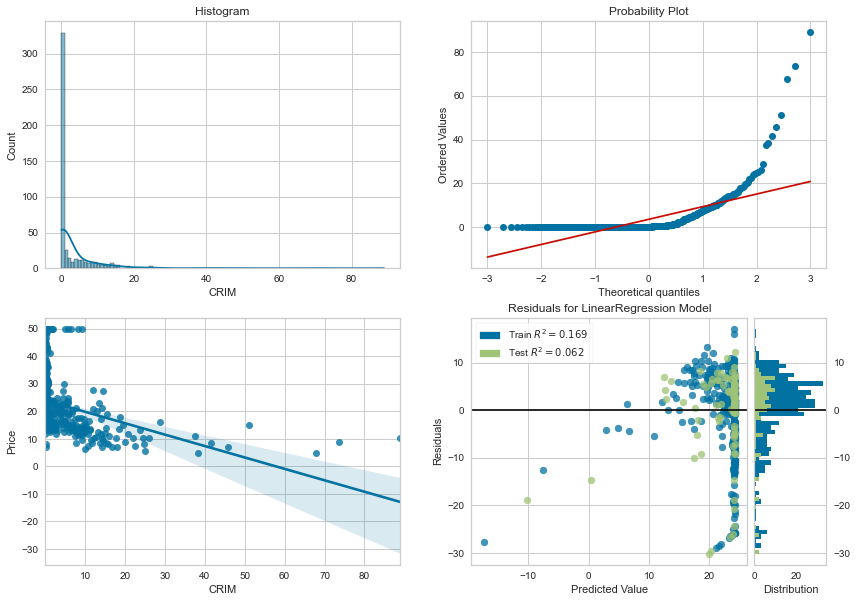

In [22]:
check_linear_model_assumptions(boston, 'CRIM')

## Detect Outliers in Machine Learning Datasets 

An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.

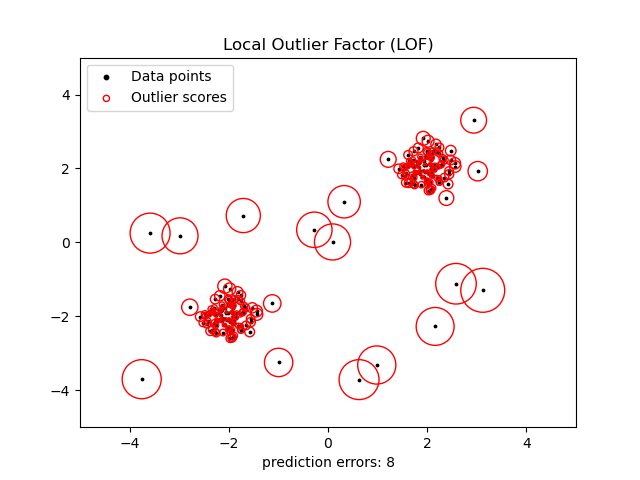

## Where to Handle Outliers?

Depending on the context, outliers either deserve special attention or should be completely ignored.

- Remove in Fuel monitoring
- Keep in fraud detection in credit card transaction

## Why We Need to Handle It?
Machine Learning algorithms are sensetive to outliers as shown in above example. Tree based models generally ignores outliers.

## How to Handle It?
Anamaly detection is a huge field of research area. There are many ways to handle it case by case or project by project.

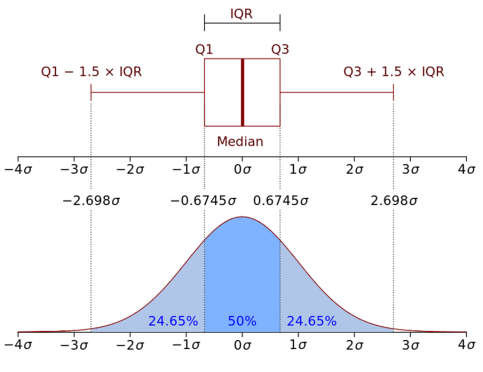

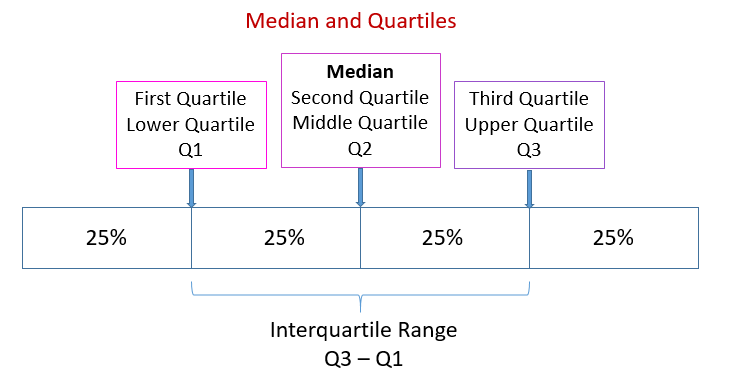

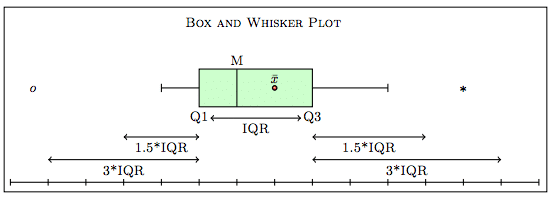

## Outliers Visualization Plot 

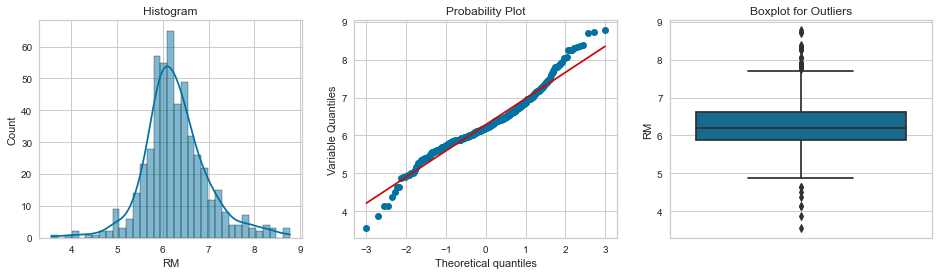

In [26]:
def check_outliers(df, variable):
    plt.figure(figsize=(16,4))
    
    ax = plt.subplot(1,3,1)
    #histogram
    sns.histplot(df[variable], bins=35, kde=True, ax=ax)
    plt.title('Histogram')
    
    # Probability Plot Q-Q PLot
    plt.subplot(1,3,2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.ylabel('Variable Quantiles')
    
    #boxplot
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot for Outliers')
    
check_outliers(boston, 'RM')

In [30]:
# features

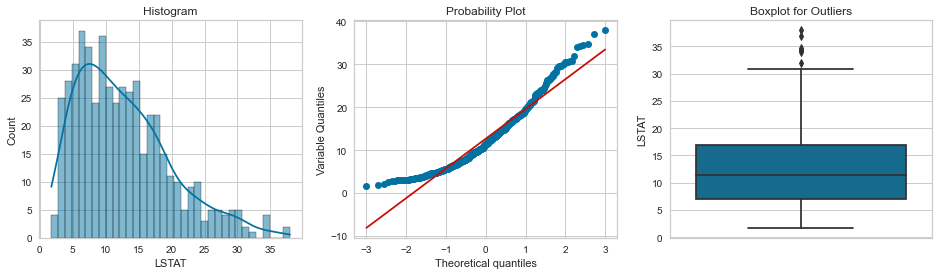

In [32]:
check_outliers(boston, 'LSTAT')

## Outlier Detection for Normal Variables 


We will create a function `find_normal_outliers()` which will find the upper and lower boundaries for normally distributed variables.

In [35]:
def find_normal_outliers(df, col):
    
    upper_limit = df[col].mean() + 2.7*df[col].std()
    lower_limit = df[col].mean() - 2.7*df[col].std()
    
    return lower_limit, upper_limit
    

In [36]:
find_normal_outliers(boston, 'RM')

(4.387568100130412, 8.181700674573161)

In [37]:
find_normal_outliers(boston, 'LSTAT')

(-6.62780283953442, 31.93392932174787)

## Outlier Detection for Skewed Variables 

In [38]:
def find_skewed_oultliers(df, col, distance):
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25) # Q3-Q1
    
    lower_limit = df[col].quantile(0.25) - (IQR*distance)
    upper_limit = df[col].quantile(0.75) + (IQR*distance)
    
    return lower_limit, upper_limit

In [41]:
find_skewed_oultliers(boston, 'LSTAT', 1.5)

(-8.057500000000005, 31.962500000000006)

In [45]:
boston[boston['LSTAT']>31.962500000000006]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4
373,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
387,22.59710,0.0,18.10,0.0,0.700,5.000,89.5,1.5184,24.0,666.0,20.2,396.90,31.99,7.4
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
438,13.67810,0.0,18.10,0.0,0.740,5.935,87.9,1.8206,24.0,666.0,20.2,68.95,34.02,8.4


##  Outliers Handeling Coding

## How can we pre-process outliers?

- Trimming: remove the outliers from our dataset
- Treat outliers as missing data, and proceed with any missing data imputation technique
- Discrestisation: outliers are placed in border bins together with higher or lower values of the distribution
- Censoring: capping the variable distribution at a max and / or minimum value

**Censoring** is also known as:

- top and bottom coding
- winsorization
- capping


https://feature-engine.readthedocs.io/en/latest/index.html

https://feature-engine.readthedocs.io/en/latest/outliercappers/Winsorizer.html

In [ ]:
# !pip install feature-engine --user

In [46]:
from feature_engine.outlier_removers import Winsorizer

In [47]:
winsorizer = Winsorizer(distribution='skewed',
                       tail='both',
                       fold=1.5,
                       variables=features)

In [48]:
boston_clean = winsorizer.fit_transform(boston)

In [49]:
boston_clean

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


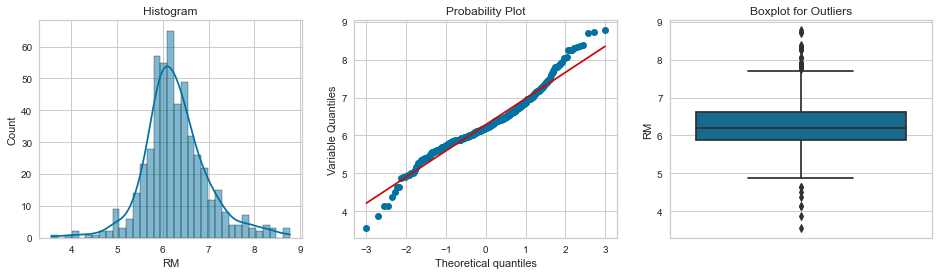

In [50]:
check_outliers(boston, 'RM')

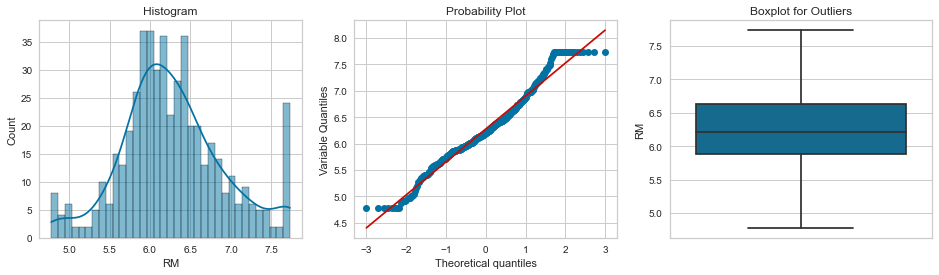

In [51]:
check_outliers(boston_clean, 'RM')

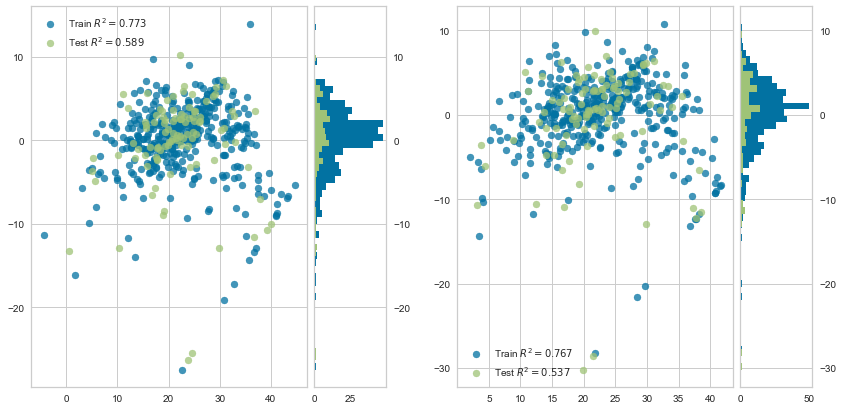

In [53]:
def run_Clean_Linear_Regression(df, cols):
    fig,ax = plt.subplots(ncols=2, figsize=(14,7))
    
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(boston[features], boston['Price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[0])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
  

    #Residuals Plot with Selected Features and Removed Outliers
    X_train, X_test, y_train, y_test = train_test_split(df, boston['Price'],
                test_size=0.2,
                random_state=0)
    
    winsorizer = Winsorizer(distribution='skewed',
                       tail='both',
                       fold=1.5,
                       variables=cols)
    
    X_train = winsorizer.fit_transform(X_train)
    X_test = winsorizer.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()

    
run_Clean_Linear_Regression(boston[features], features)

In [54]:
imp_features

['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

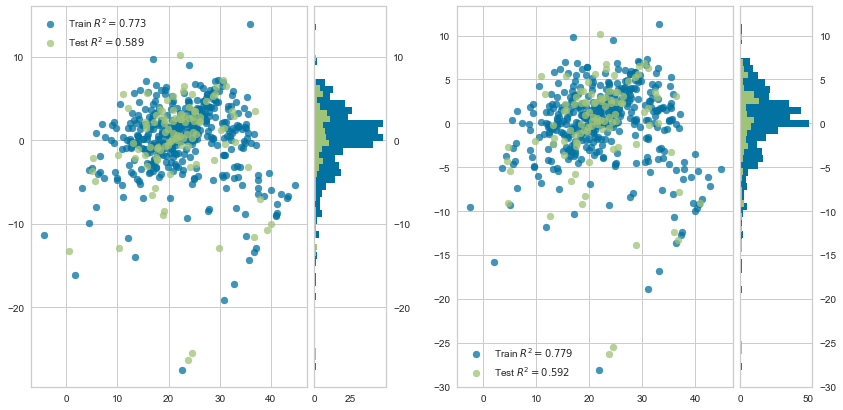

In [55]:
run_Clean_Linear_Regression(boston[features], imp_features)

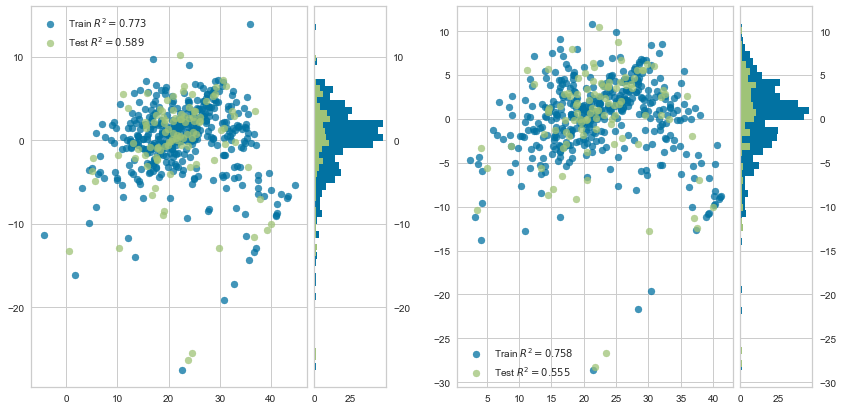

In [56]:
run_Clean_Linear_Regression(boston[imp_features], imp_features)

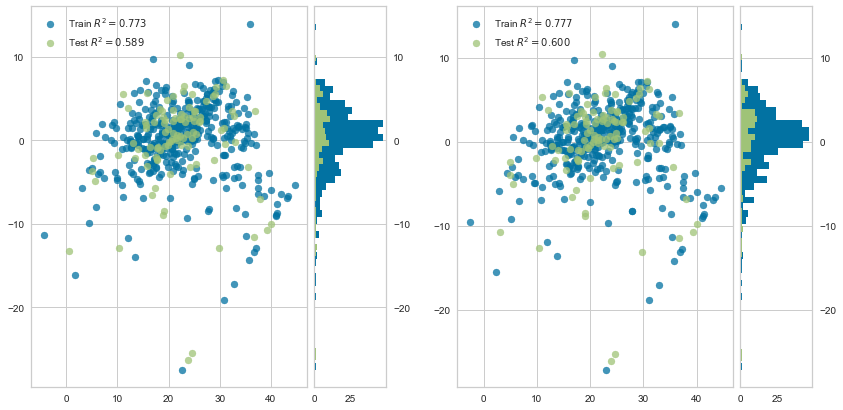

In [57]:
run_Clean_Linear_Regression(boston[features], ['LSTAT', 'DIS', 'NOX'])

## Feature Transformation and Outliers Removal 

In [58]:
from sklearn.preprocessing import PowerTransformer

C:\Users\laxmi\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


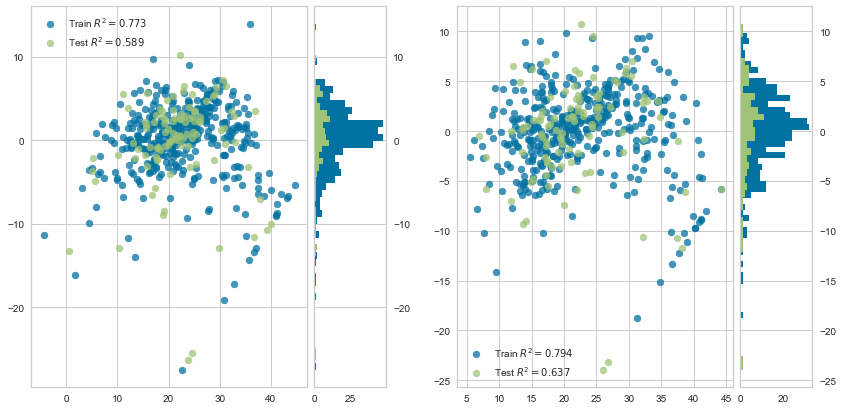

In [59]:
def run_Outliers_Transformations_Linear_Regression(df, cols):
    fig,ax = plt.subplots(ncols=2, figsize=(14,7))
    
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(boston[features], boston['Price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[0])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
  

    #Residuals Plot with Selected Features and Removed Outliers and Yeo-Johnson Transformation
    X_train, X_test, y_train, y_test = train_test_split(df, boston['Price'],
                test_size=0.2,
                random_state=0)
    
    #outliers removal
    winsorizer = Winsorizer(distribution='skewed',
                       tail='both',
                       fold=1.5,
                       variables=cols)
    
    X_train = winsorizer.fit_transform(X_train)
    X_test = winsorizer.transform(X_test)
    
    #transformations
    transformer = PowerTransformer(method='yeo-johnson', standardize=True)
    X_train = transformer.fit_transform(X_train)
    X_test = transformer.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()

    
run_Outliers_Transformations_Linear_Regression(boston[features], features)

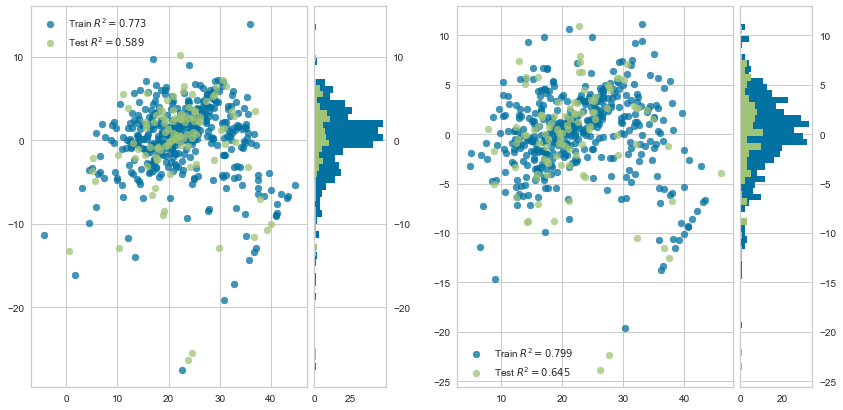

In [60]:
run_Outliers_Transformations_Linear_Regression(boston[features], imp_features)

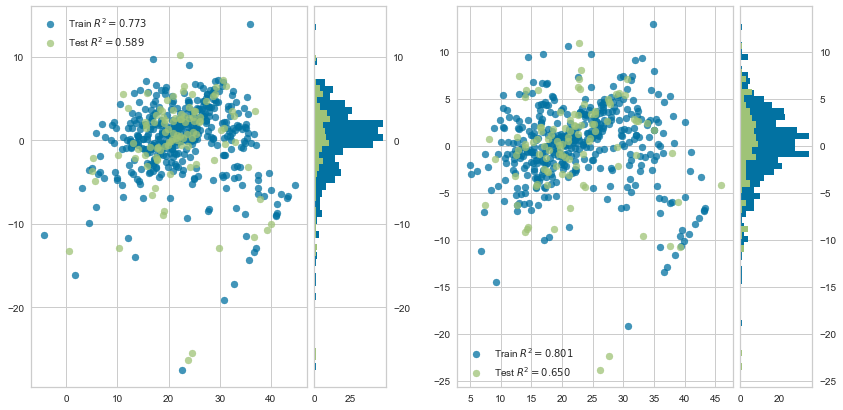

In [61]:
run_Outliers_Transformations_Linear_Regression(boston[features], ['LSTAT', 'DIS', 'NOX'])

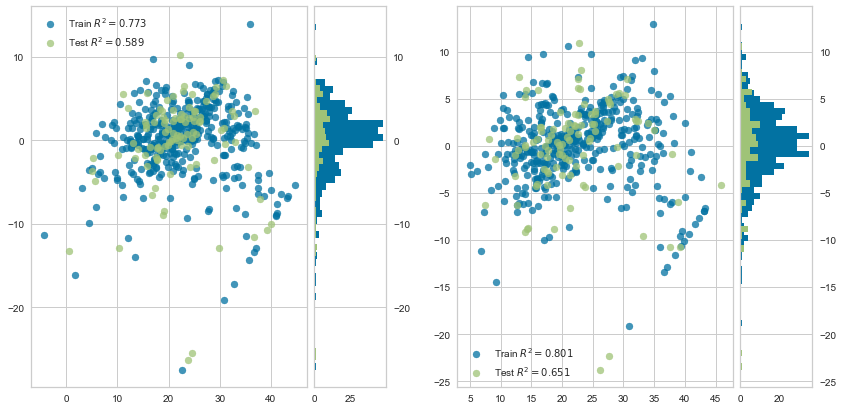

In [65]:
run_Outliers_Transformations_Linear_Regression(boston[features], ['LSTAT', 'NOX'])